In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
from ta.momentum import RSIIndicator
from ta.trend import MACD
from datetime import datetime, timedelta

In [2]:
def getTickerList(df):
    return list(df["Ticker"].unique())   

def stockSetup(df, ticker):
    '''the stock setup function cleans the dataframe and filters it according to a specific ticker you input'''
    
    df = df[df["Ticker"]==ticker]

    df = df.round(2)
    
    df = df.drop("Return", axis=1)
    
    #sector = df['GICS Sector'][0]
    df = df.drop("GICS Sector", axis=1)
    
    #industry = df['GICS Sub Industry'][0]
    df = df.drop("GICS Sub Industry", axis=1)
    
    #cik = df['CIK'][0]
    df = df.drop("CIK", axis=1)
    
    #headLoc = df['Headquarters Location'][0]
    df = df.drop("Headquarters Location", axis=1)
    
    #DateFirstAdded = df['Date first added'][0]
    df = df.drop("Date first added", axis=1)
    
    #founded = df['Founded'][0]
    df = df.drop("Founded", axis=1)

    df = df.drop("Ticker", axis=1)
    
    #company = df["Company"][0]
    df = df.drop("Company", axis=1)
    
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    
    return df # (, sector, industry, cik, headLoc, DateFirstAdded, founded)


In [3]:
def generateRSI(df, period=14):
  return RSIIndicator(df["Adj Close"], period).rsi()

def generateMACD(df, periodShort=12, periodLong=26):
  return MACD(df["Adj Close"], n_slow=periodShort, n_fast=periodLong).macd()

def generateMACDSignal(df, period=9):
  return MACD(df["Adj Close"], n_sign=period).macd_signal()

def generateMACDDiff(df, periodShort=12, periodLong=26, periodSign=9):
  return MACD(df["Adj Close"], n_slow=periodShort, n_fast=periodLong, n_sign=periodSign).macd_diff()

def generatePercentageChange(df):
  return df["Adj Close"].pct_change()*100

def generateSMA(df, period=7):
    return df['Adj Close'].rolling(window=period).mean()

In [4]:
def plotAdjClose(df, size=(15,6)):
  print("Plotting...")
  plt.figure(figsize=(size))
  sns.lineplot(x = df.index, y=df['Adj Close'])
  plt.show()

def plotRSI(df, overBought=70, overSold=30, period=14):
  print("Generating RSI Data...")
  df["RSI"] = generateRSI(df, period)
  print("Plotting...")
  plt.figure(figsize=(15,3))
  sns.lineplot(x = df.index, y=df['RSI'])
  plt.plot([df.index.min(),df.index.max()],[overBought, overBought])
  plt.plot([df.index.min(),df.index.max()],[overSold, overSold])
  plt.show()

def plotMACD(df, periodShort=12, periodLong=26, periodSignal=9):
  print("Generating MACD Data...")
  df['MACD'] = generateMACD(df, periodShort, periodLong)
  df["MACD Signal"] = generateMACDSignal(df, periodSignal)
  df['MACD Difference'] = generateMACDDiff(df, periodShort, periodLong, periodSignal)
  print("Plotting...")
  plt.figure(figsize=(15,3))
  sns.lineplot(x = df.index, y=df['MACD'])
  sns.lineplot(x = df.index, y=df['MACD Signal'])
  plt.show()

def plotPercentageChange(df):
  print("Generating Percentage Change Data...")
  df['Percentage Change'] = generatePercentageChange(df)
  print("Plotting...")
  plt.figure(figsize=(15,3))
  sns.lineplot(x = df.index, y=df['Percentage Change'])
  plt.show()

def plotVolume(df):
  print("Plotting...")
  plt.figure(figsize=(15,3))
  sns.lineplot(x=df.index, y=df['Volume'])
  plt.show()
  

In [5]:
def getOption(options, statement):
    # precondition: statement has to have the options all ready formated.

    # statemnt is a string that is all of the items of options (pre-formatted) so you can show what each option does (useful for menu lists)
    # asks the user for intial input
    # better formated confirmOption (better for a list with more than just 2 options)

    # prints formated options for user to sepect
    print(statement)
    # makes sure the user enters an input which is an option
    userinput = input("Please enter a option: ")
    while not(userinput in options):
        print("INVALID INPUT! Please try again:\n" + statement)
        userinput = input("Please enter a option: ")

    # returns checked user input
    return userinput

In [6]:
def filter_dates(df):
    start_date = input("Enter start date in format MM-DD-YYYY ")
    end_date = input("Enter end date in format MM-DD-YYYY ")
    df = df.loc[start_date:end_date]
    return df

main method

In [7]:
SAndPData = pd.read_csv("database2.csv")

In [8]:
options = ['0', '1', '2', '3', '4', '5', '6']
statement = "\n'0' to quit\
            \n'1' select new ticker\
            \n'2' to plot stock indicators and price\
            \n'3' change timeframe\
            \n'4' reset timeframe\
            \n'5' to change falling knife conditions\
            \n'6' to select falling knife and plot stock indicators and price"

In [9]:
def plottingManager(df):
        plotOptions = ['0', '1', '2', '3', '4']
        plotStatement = "\nRemeber: If your time frame is large, it will take a long time to graph\
                \n'0' to go back\
                \n'1' to plot closing price\
                \n'2' to plot Volume\
                \n'3' to plot RSI\
                \n'4' to plot MACD"

        plotOption = getOption(plotOptions, plotStatement)
        
        if plotOption == '1':
                plotAdjClose(df) 

        if plotOption == '2':
                plotVolume(df)

        if plotOption == '3':
                plotRSI(df)

        if plotOption == '4':
                plotMACD(df)

In [10]:
def findFallingKnives(df, window=4, SMAPeriod=7):
    # allows you to find fallingKnives based on a stock ticker and a condition of RSI, MACD and a SMA
    # you have to change the conditions within this function
    print("\nGenerating new data")

    df["RSI"] = generateRSI(df)
    df["MACD"] = generateMACD(df)
    df["SMA"] = generateSMA(df, SMAPeriod)

    # these are the condition statements below: I couldnt figure out how to keep them in one line so..
    print("\nFiltering data based on conditions")
    fallingKniveDf = df[df["MACD"] <= -.5]
    fallingKniveDf = df[df['Adj Close'] < df['SMA']]
    fallingKniveDf = df[df['RSI'] <40]
    print(len(fallingKniveDf))


    # takes the filtered df from above and graphs a specific interval around that date
    print("Creating new dataframes")
    aroundIndex = []
    for date in fallingKniveDf.index:
      aroundIndex.append(pd.date_range(start=date - timedelta(weeks=window/2), end=date+ timedelta(weeks=window/2)))

    FallingKnifeSubset = []
    for dates in aroundIndex:
        FallingKnifeSubset.append(df[df.index.isin(dates)])
    print(len(FallingKnifeSubset))
    return FallingKnifeSubset

Open  Close  Adj Close   High    Low      Volume
Date                                                         
2018-01-02  75.09  74.36      70.27  75.18  74.02  15819800.0
2018-01-03  74.35  74.59      70.49  74.74  73.97  14657900.0
2018-01-04  75.01  75.51      71.36  76.11  74.66  16864900.0
2018-01-05  75.71  75.41      71.26  75.77  74.96  15300500.0
2018-01-08  75.17  74.53      70.43  75.24  74.33  14215700.0
...           ...    ...        ...    ...    ...         ...
2018-12-17  54.85  54.25      52.40  55.93  53.92  26212500.0
2018-12-18  54.72  53.93      52.09  55.67  53.55  27302000.0
2018-12-19  53.90  52.82      51.02  55.40  52.18  31483100.0
2018-12-20  52.21  52.27      50.49  53.25  51.72  39800000.0
2018-12-21  51.90  50.24      48.53  52.56  49.88  52323000.0

[246 rows x 6 columns]

'0' to quit            
'1' select new ticker            
'2' to plot stock indicators and price            
'3' change timeframe            
'4' reset timeframe            
'5' to c

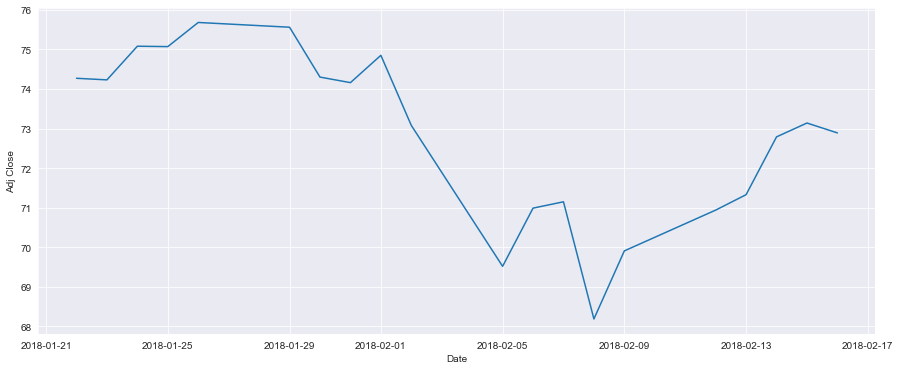


'0' to quit            
'1' select new ticker            
'2' to plot stock indicators and price            
'3' change timeframe            
'4' reset timeframe            
'5' to change falling knife conditions            
'6' to select falling knife and plot stock indicators and price

Generating Falling Knives

Generating new data

Filtering data based on conditions
65
Creating new dataframes
65

 Found Falling Knives

Remeber: If your time frame is large, it will take a long time to graph                
'0' to go back                
'1' to plot closing price                
'2' to plot Volume                
'3' to plot RSI                
'4' to plot MACD
Generating MACD Data...
Plotting...


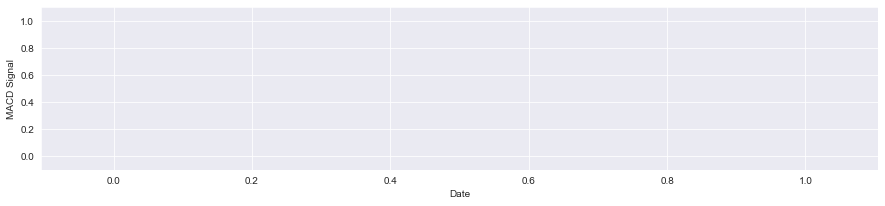


'0' to quit            
'1' select new ticker            
'2' to plot stock indicators and price            
'3' change timeframe            
'4' reset timeframe            
'5' to change falling knife conditions            
'6' to select falling knife and plot stock indicators and price


In [11]:
option = '1'

while option != '0':

    if option == '1':
        ticker = input("Please enter a ticker: ").upper()
        while not(ticker in getTickerList(SAndPData)):
            print("Ticker is not valid. Please try again. ")
            ticker = input("Please enter a ticker: ")
        
        # cleans the dataframe and filters it according to a specific ticker you input
    
        stockData = stockSetup(SAndPData, ticker)
        
        stockDataBackup = stockData
        stockData = filter_dates(stockData)
        print(stockData.head(-5))

    if option == '2':
        # TO DO: add more indicators
        plottingManager(stockData)

    if option == '3':
        stockData = stockDataBackup
        stockData = filter_dates(stockData)
    
    if option == '4':
        stockData = stockDataBackup
    
    if option == '5':
        # TO DO: build out falling knife conditions
        pass
        

    if option == '6':
        print("\nGenerating Falling Knives")
        fallingKnifeData = findFallingKnives(stockData)
        print("\n Found Falling Knives")
        # TO DO: figure out how to have the user select a specific falling knife
        fallingKnife = fallingKnifeData[0]
        plottingManager(fallingKnife)


    option = getOption(options, statement)